# Práctica 4
### Reconocimiento de Patrones y Aprendizaje Automatizado
### Uriel Pedraza Santiago

1. Función "preprocess_text"

In [ ]:
#Crear una función de preprocesamiento del texto
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
#Biblioteca para lematizar
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
  #Se tokeniza el texto
  tokens = word_tokenize(text)

  #Lower case
  tokens = [word.lower() for word in tokens]

  #Quitar caracteres especiales y numeros
  #Primero se quitan lo caracteres especiales
  aux = []
  for s in tokens:
    new = " "
    new = "".join(filter(str.isalnum,s))
    aux.append(new)
  tokens = aux

  #Ahora se quitan los caracteres numericos
  #Se define una lista con los números de 0 al 9
  numericos = [str(i) for i in range(10)]
  numericos
  for k in range(len(tokens)):
    word2 = ''
    for char in tokens[k]:
      if (char in numericos) == False:
        word2 = word2 + char
    tokens[k] = word2

  #Eliminar stop words
  aux = []
  for word in tokens:
    if word not in (stopwords.words('english')):
      aux.append(word)
  tokens = aux

  #Quitar cadenas vacias
  tokens = [j for j in tokens if j != '']

  #Aplicar lematizacion
  tokens = [WordNetLemmatizer.lemmatize('n', j) for j in tokens]

  return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Prueba de la función
email = "Congratulations! You've won a free trip to Hawaii. 11Click here to claim your prize!"
print(preprocess_text(email))

['congratulation', 'free', 'trip', 'hawaii', 'click', 'claim', 'prize']


2. Clasificador de textos

In [ ]:
# Leemos el conjunto de datos "spam_ham_dataset.csv"
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
#Se debe indicar la ubicación del archivo "spam_ham_dataset.csv" en google drive
df = pd.read_csv('/content/gdrive/MyDrive/Practicas Reconocimiento de Patrones/Practica_4/spam_ham_dataset.csv')
df

Mounted at /content/gdrive


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
# Quitamos las columnas "Unnamed: 0" y "label"
df2 = df.drop("Unnamed: 0",axis=1).drop("label",axis=1)
df2

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [ ]:
# Obtenemos 4 listas, texto completo, etiquetas, spam y ham
texto = df["text"]
labels = df["label_num"]
spam = df[df["label_num"]==1]["text"]
ham = df[df["label_num"]==0]["text"]

# Aplicamos la funcion del ejercicio 1 a cada elemento de las listas con texto
texto_2 = [preprocess_text(email) for email in texto]
spam_2 = [preprocess_text(email) for email in spam]
ham_2 = [preprocess_text(email) for email in ham]

# Obtenemos el conjunto de palabras unicas de spam
set_spam = set()
for email in spam_2:
  set_spam.update(set(email))

# Obtenemos el conjunto de palabras unicas de ham
set_ham = set()
for email in ham_2:
  set_ham.update(set(email))

dict_spamicity = {}
#Obtenemos la proba de que aparezca una palabra dado que es spam
#Iteramos sobre las palabras que aparecen en spam
#Iteramos sobre los correos de spam
total_spam = len(spam)
for palabra in set_spam:
  pInSpam = 0
  for email in spam_2:
    if palabra in email:
      pInSpam +=1
  if pInSpam ==0:
    proba = 1/total_spam
  else:
    proba = pInSpam/total_spam
  dict_spamicity[palabra] = proba

dict_ham = {}
#Obtenemos la proba de que aparezca una palabra dado que es ham
#Iteramos sobre las palabras que aparecen en ham
# Iteramos sobre los correos de ham
total_ham = len(ham)
for palabra in set_ham:
  pInHam = 0
  for email in ham_2:
    if palabra in email:
      pInHam +=1
  if pInHam ==0:
    proba = 1/total_ham # Parametro
  else:
    proba = pInHam/total_ham
  dict_ham[palabra] = proba

#Probabilidad de que un correo se spam
S = total_spam/(total_spam+total_ham)
#Probabilidad de que un correo sea ham
H = total_ham/(total_spam+total_ham)



3. Evaluación del modelo

In [ ]:
# Preparamos tests para medir metricas
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(texto_2, labels, test_size=0.33, random_state=42)

# Creamos funcion que reciba una lista de probabilidades, multiplique todas y regrese el resultado
def mult(probas) :        # multiplicar todas las probas
    total_prob = 1
    for proba in probas:
      total_prob*=proba
    # Multiplicar todas las probas
    return total_prob
# Creamos funcion que aplique Naive_Bayes a un email, con un threshold como parametro
def Naive_Bayes(email,threshold):
    probs = []
    S # prob_spam
    H # prob_ham
    # Iteramos sobre las palabras del email
    for palabra in email:

    # Calculamos la proba de PdadoS #*Si es 0 asignamos una probabilidad baja 1/(total_spam+2)
      try:
        PdadoS = dict_spamicity[palabra]
      except:
        PdadoS = 1/total_spam
    # Calculamos la proba de PdadoH #*Si es 0 asignamos una probabilidad baja 1/(total_spam+2)
      try:
          PdadoH = dict_ham[palabra]
      except:
          PdadoH = 1/total_ham
    # Aplicamos Bayes para obtener SdadoP
      probaB = PdadoS*S/(PdadoS*S+ PdadoH*H)
      probs.append(probaB)
    # Multiplicamos todas las probas para obtener el total de SdadoEmail
    SdadoEmail = mult(probs)
    # Aplicamos el Threshold para determinar si es o no es spam
    # print(SdadoEmail)
    if SdadoEmail >= threshold:
      SdadoEmail =1
    else:
      SdadoEmail = 0
    return SdadoEmail


y_pred = [Naive_Bayes(email,.00000000000001) for email in X_test]

from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1246
           1       0.69      0.43      0.53       461

    accuracy                           0.80      1707
   macro avg       0.76      0.68      0.70      1707
weighted avg       0.78      0.80      0.78      1707



Comparando con el resultado obtenido en el notebook **2024_02_22_RPAA_Naive_Bayes.ipynb**


                  precision    recall  f1-score   support

           0       0.76      0.98      0.86      1246
           1       0.75      0.18      0.29       461
    accuracy                           0.76      1707
    macro avg       0.76      0.58     0.57      1707
    weighted avg    0.76      0.76     0.70      1707

Text(0.5, 1.0, 'Confusion Matrix')

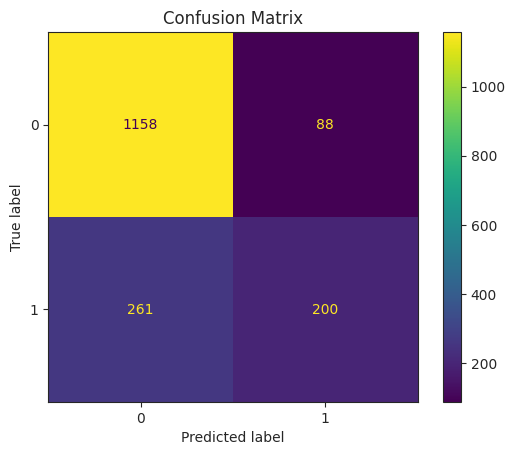

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.title("Confusion Matrix")

Comparando con la matriz de confusión obtenido en el notebook **2024_02_22_RPAA_Naive_Bayes.ipynb**

|predict label | 0 | 1 |
|-------------|---|---|
|true label|||
| 0| 1219|27|
|1| 379|82|

El modelo mejorado presenta un mejor desempeño clasificando observaciones tipo 1, pero pierde precisión en el tipo 0.

El recall nos indica que en general aumento la sensibilidad en el modelo mejorado. Y hubo un ligero aumento en la métrica f1-score.

En general el nuevo modelo es una ligera mejora con respecto al modelo anterior.